# Two-group Linearly Anisotropic Benchmark from the [Criticality Verification Benchmark Suite](https://www.sciencedirect.com/science/article/pii/S0149197002000987/pdf?md5=299011580a5d17bc208703ef425a6ba6&pid=1-s2.0-S0149197002000987-main.pdf)

Tables 49 and 50 from the [Criticality Verification Benchmark Suite](https://www.sciencedirect.com/science/article/pii/S0149197002000987/pdf?md5=299011580a5d17bc208703ef425a6ba6&pid=1-s2.0-S0149197002000987-main.pdf) give the two-group, linearly anisotropic cross sections for a uranium research reactor. The critical width of the slab region is $18.9918 cm$. To incorporate higher-order scattering, we take a similar approach to our treatment of heterogeneity. Each moment is added as its train to the scattering operator. Therefore, the scattering operator's rank will increase with each scattering moment.

In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = True

from tt_nte.benchmarks import research_reactor_anisotropic
from tt_nte.methods import DiscreteOrdinates
from tt_nte import solvers

import supporting.plotting as tt_plt

Below, we demonstrate the matrix generalized eigenvalue solver, ALS in TT and QTT formats, and AMEn in QTT format.

-- Mat/GES
--   N = 2, k = 0.97228, exec_time = 0.014
--   N = 4, k = 0.99746, exec_time = 0.024
--   N = 8, k = 0.99948, exec_time = 0.096
--   N = 16, k = 0.99988, exec_time = 0.513
--   N = 32, k = 0.99997, exec_time = 2.33
-- Mat/Power
--   N = 2, k = 0.9722, exec_time = 1.462
--   N = 4, k = 0.99737, exec_time = 3.452
--   N = 8, k = 0.99939, exec_time = 9.618
--   N = 16, k = 0.99979, exec_time = 30.406
--   N = 32, k = 0.99989, exec_time = 107.499
-- TT-ALS
--   N = 2, k = 0.97219, exec_time = 132.589
--   N = 4, k = 0.99735, exec_time = 170.149
--   N = 8, k = 0.99938, exec_time = 168.651
--   N = 16, k = 0.99978, exec_time = 165.415
--   N = 32, k = 0.99987, exec_time = 171.727
-- QTT-MALS
--   N = 2, k = 0.97219, exec_time = 3.209
--   N = 4, k = 0.99737, exec_time = 4.513
--   N = 8, k = 0.99939, exec_time = 6.919
--   N = 16, k = 0.99979, exec_time = 13.682
--   N = 32, k = 0.99989, exec_time = 46.539
-- QTT-AMEn
--   N = 2, k = 0.97219, exec_time = 4.205
--   N = 4, k = 0.

<Figure size 640x480 with 0 Axes>

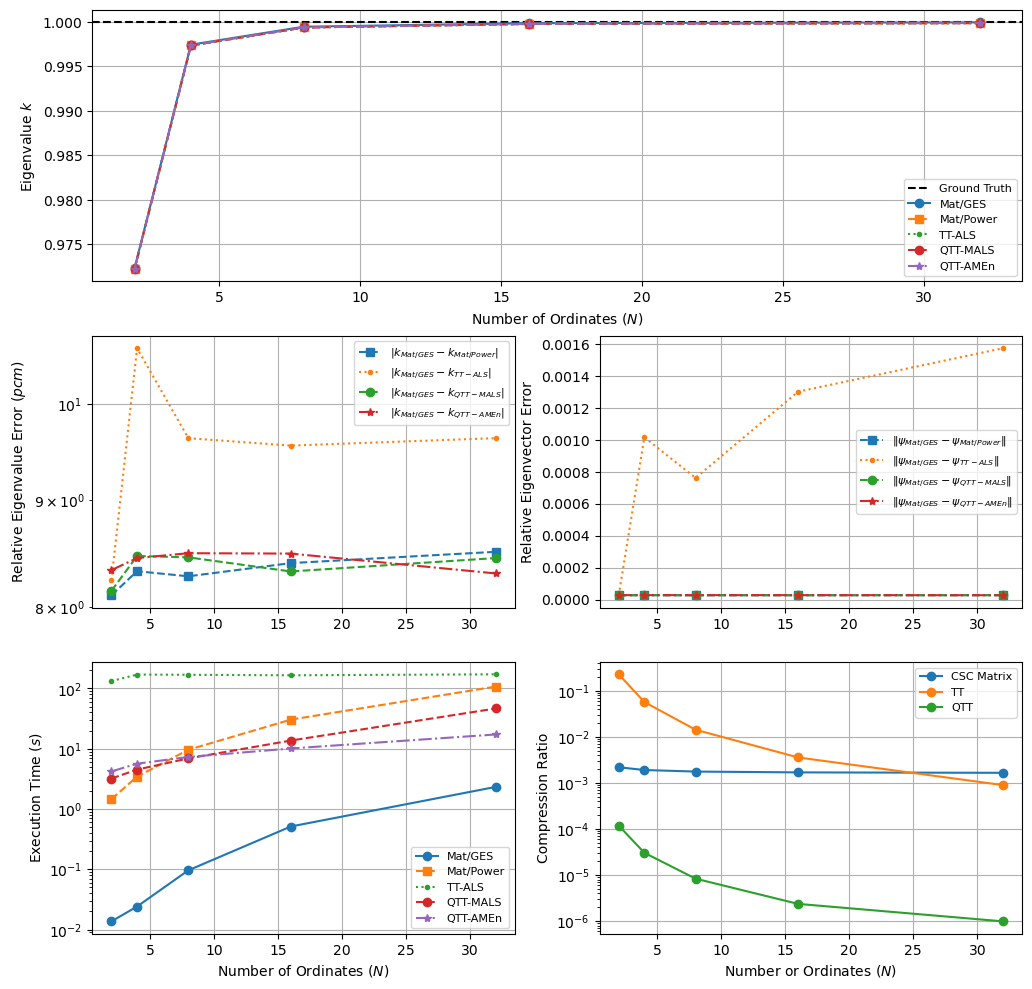

In [2]:
# Increase slab geometry fidelity
xs_server, geometry = research_reactor_anisotropic(1024, "reflective")

# Initialize SN solver
SN = DiscreteOrdinates(
    xs_server=xs_server, 
    geometry=geometry, 
    num_ordinates=2,
    tt_fmt="tt",
)

# Define dictionary of solvers for plotting
tt_solvers = {
    "Mat/Power": (solvers.Matrix, {"tt_fmt": "tt"}, {}, {"max_iter": 1000}, "s--"),
    "TT-ALS": (solvers.ALS, {"tt_fmt": "tt"}, {}, {"ranks": 4, "max_iter": 1000}, ".:"),
    "QTT-MALS": (
        solvers.MALS, 
        {"tt_fmt": "qtt", "qtt_threshold": 1e-15}, 
        {},
        {"max_iter": 1000},
        "o--",
    ),
    "QTT-AMEn": (
        solvers.AMEn, 
        {"tt_fmt": "qtt", "qtt_threshold": 1e-15}, 
        {}, 
        {"max_iter": 1000},
        "*-."
    ),
}

num_ordinates = 2 ** np.arange(1, 6)

plt.clf()
fig = plt.figure(figsize=(12, 12))
tt_plt.plot_ordinate_perturbation(SN, num_ordinates, tt_solvers, fig=fig)
plt.savefig("figs/anisotropic_solvers.png", dpi=300)
plt.show()